## Гендерный анализ тонального словаря русского языка КартаСловСент

0. В качестве датасета с размеченной тональностью, возьмем словарь из работы Кулагина Д. И. "Открытый тональный словарь
русского языка КартаСловСент" (https://www.dialog-21.ru/media/5570/kulagindi026.pdf). Словарь доступен для скачивания
по ссылке https://github.com/dkulagin/kartaslov. Будем использовать для него имя DATA-S.
1. Для данной работы из датасета (словника) DATA-S используются столбцы 'term' (содержит слово или словосочетание),
 'tag' (метка тональности из набора <NEUT(Нейтральная), PSTV(Позитивная), NGTV(Негативная)>. Остальные столбцы не
 используются. Более детальное описание датасета см. в работе из п.0.
2. Будем рассматривать каждый элемент датасета (словника) DATA-S как отдельный текст, состоящий из одного слова или
словосочетания. С помощью модели RuSb_big, описанной в работе Бадеева Д.Н. "Gender Profiling in Social Network"
(https://github.com/dbadeev/gender_profiling/blob/main/reports/Dmitry_Badeev__Gender_Profiling_in_Social_Network_rus.pdf)
проведем гендерную разметку таких текстов. При этом, значения для разметки будем брать не с выходного слоя модели
(0 для F и 1 для M), а с предыдущего, где текст характеризуется парой (f, m), где 0. =< m,f =< 1.
В итоге, получим датасет DATA-SG с дополнительной гендерной разметкой, а именно - с тремя дополнительными столбцами
'Female', 'Male' и 'F - M'. Первый и второй содержат вероятностную оценку модели на принадлежность элемента к тому или
иному гендернрому классу, последний - разность между значениями в столбцах 'Female', 'Male'.
4. Датасет DATA-SG подготовлен вне рамок данного блокнота. Текст программы подготовки датасета находится по ссылке ...

Считываем датасет DATA-SG

In [218]:
import pandas as pd

df = pd.read_csv("kartaslov_sent_gender.csv", sep='\t')
df.shape

(46127, 12)

Удаляем неиспользуемые столбцы

In [219]:
df.drop(df.columns[[0, 3, 4, 5, 6, 7, 8]], axis=1, inplace=True)

Сортируем таблицу по значениям столбца 'Male'

In [220]:
sorted_m = df.sort_values(by='Male')

График распределения значений столбца 'Male'

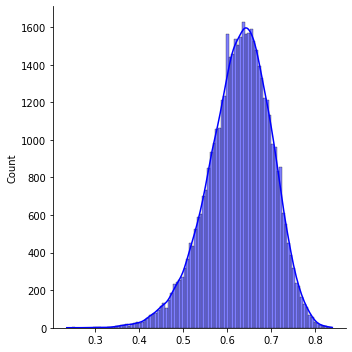

In [221]:
import seaborn as sns
import matplotlib as mpl

x = df['Male'].values
sns.set_palette('hls')
mpl.rc('figure', figsize=(6, 4))
sns.displot(x, bins=100, color='b', kde=True)

Первые 15 значений с наибольшим "мужским" рейтингом, выставленным гендерной моделью

In [222]:
sorted_m.tail(15).sort_values(by='Male', ascending=False)

,term,tag,Female,Male,F - M
19982,недостача,NGTV,0.401,0.840,-0.439
13225,исчерпание,NGTV,0.470,0.837,-0.367
21002,неудачность,NGTV,0.421,0.829,-0.408
20079,незапятнанность,PSTV,0.418,0.829,-0.411
19671,неблаговидность,NGTV,0.481,0.829,-0.348
41453,трудоёмкость,NEUT,0.480,0.829,-0.349
39256,способствовать,PSTV,0.385,0.828,-0.443
6971,горючесть,NEUT,0.454,0.828,-0.374
12538,изъян,NGTV,0.342,0.827,-0.485
39486,старикан,NGTV,0.354,0.823,-0.469


Первые 15 значений с наименьшим "мужским" рейтингом, выставленным гендерной моделью

In [223]:
sorted_m.head(15)

,term,tag,Female,Male,F - M
23337,оптимистка,PSTV,0.649,0.235,0.414
12127,идеалистка,PSTV,0.620,0.248,0.372
35422,реалистка,NEUT,0.595,0.249,0.346
37490,сказочница,NEUT,0.778,0.271,0.507
17339,мечтательница,PSTV,0.820,0.276,0.544
21691,обжорка,NGTV,0.605,0.282,0.323
42703,упрямица,NGTV,0.554,0.289,0.265
41694,тьма-тьмущая,NGTV,0.666,0.294,0.372
26562,пессимистка,NGTV,0.670,0.297,0.373
1369,бездельница,NGTV,0.620,0.300,0.320


Сортируем таблицу по значениям столбца 'Female'

In [224]:
sorted_f = df.sort_values(by='Female')

График распределения значений столбца 'Female'

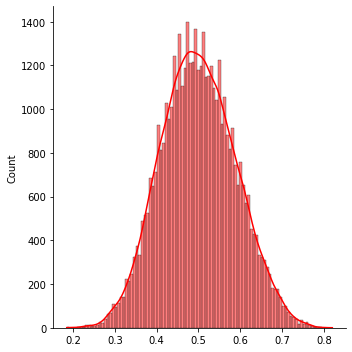

In [225]:
x = df['Female'].values
sns.set_palette('hls')
mpl.rc('figure', figsize=(6, 4))
sns.displot(x, bins=100, color='r', kde=True)

Первые 15 значений с наибольшим "женским" рейтингом, выставленным гендерной моделью

In [226]:
sorted_f.tail(15).sort_values(by='Female', ascending=False)

,term,tag,Female,Male,F - M
17339,мечтательница,PSTV,0.820,0.276,0.544
1459,безоблачность,PSTV,0.805,0.537,0.268
41787,убаюкать,PSTV,0.795,0.474,0.321
17483,мини-платье,NEUT,0.793,0.448,0.345
41789,убаюкивать,PSTV,0.792,0.528,0.264
18150,мурлыкать,PSTV,0.791,0.533,0.258
43114,ухаживание,PSTV,0.784,0.576,0.208
14080,клубочек,NEUT,0.783,0.533,0.250
36250,садомазохистка,NGTV,0.781,0.428,0.353
21385,ночничок,NEUT,0.780,0.498,0.282


Первые 15 значений с наименьшим "женским" рейтингом, выставленным гендерной моделью

In [227]:
sorted_f.head(15)

,term,tag,Female,Male,F - M
44468,частноправовой,NEUT,0.185,0.677,-0.492
34060,разгребать,NEUT,0.188,0.747,-0.559
8465,докопаться,NGTV,0.190,0.696,-0.506
17073,межпартийный,NEUT,0.202,0.772,-0.570
13863,киномеханик,NEUT,0.208,0.691,-0.483
23158,операционка,NEUT,0.211,0.585,-0.374
40576,телеаудитория,NEUT,0.212,0.533,-0.321
4052,внутрипартийный,NEUT,0.214,0.722,-0.508
40360,сырьевой,NEUT,0.215,0.679,-0.464
14792,копал,NEUT,0.219,0.717,-0.498


Сортируем таблицу по значениям столбца 'F - M'

In [228]:
sorted_fm = df.sort_values(by='F - M')

График распределения значений столбца 'F - M'

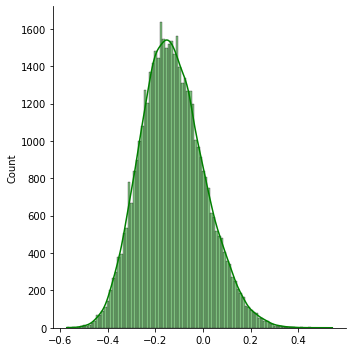

In [229]:
x = df['F - M'].values
sns.set_palette('hls')
mpl.rc('figure', figsize=(6, 4))
sns.displot(x, bins=100, color='g', kde=True)

Первые 15 значений с наибольшим преимуществом "мужского" рейтинга над "женским", выставленным гендерной моделью

In [230]:
sorted_fm.head(15)

,term,tag,Female,Male,F - M
34059,разгребание,NEUT,0.249,0.822,-0.573
17073,межпартийный,NEUT,0.202,0.772,-0.570
34060,разгребать,NEUT,0.188,0.747,-0.559
9861,завотделом,NEUT,0.231,0.778,-0.547
25300,партийность,NEUT,0.283,0.823,-0.540
12737,инкассатор,NEUT,0.228,0.761,-0.533
21117,нефтехимия,NEUT,0.248,0.776,-0.528
28121,подоходный,NEUT,0.230,0.757,-0.527
28933,политсовет,NEUT,0.227,0.753,-0.526
5256,выборщик,NEUT,0.266,0.790,-0.524


Первые 15 значений с наибольшим преимуществом "женского" рейтинга над "мужским", выставленным гендерной моделью

In [231]:
sorted_fm.tail(15).sort_values(by='F - M', ascending=False)

,term,tag,Female,Male,F - M
17339,мечтательница,PSTV,0.820,0.276,0.544
37490,сказочница,NEUT,0.778,0.271,0.507
454,альпинистка,NEUT,0.766,0.314,0.452
5427,выдумщица,NEUT,0.757,0.312,0.445
41790,убаюкивающе,PSTV,0.749,0.334,0.415
23337,оптимистка,PSTV,0.649,0.235,0.414
33492,путешественница,PSTV,0.758,0.351,0.407
37822,скулила,NGTV,0.750,0.359,0.391
42973,усыпляюще,NEUT,0.745,0.358,0.387
8943,дрессировщица,NEUT,0.756,0.376,0.380


Статистика по новым, гендерным столбцам

In [232]:
df.describe()

,Female,Male,F - M
count,46127.000000,46127.000000,46127.000000
mean,0.499573,0.627804,-0.128231
std,0.088715,0.072125,0.133347
min,0.185000,0.235000,-0.573000
25%,0.437000,0.583000,-0.222000
50%,0.497000,0.633000,-0.136000
75%,0.561000,0.678000,-0.043000
max,0.820000,0.840000,0.544000


Пусть (3F + SF, 3M + SM) - пара чисел, где 3F - третий квартиль, SF - стандартное отклонение столбца значений
'Female'; 3M - третий квартиль, SM - стандартное отклонение столбца значений 'Male' элементов DATA-SG.
Будем говорить, что элемент обладает модельной гендерной выразительностью (mge - model gender expression),
если хотя бы одно из его значений F или М оказалось больше либо равно соответствующего (3F + SF, 3M + SM). Т.е. элемент
обладающий mge, может быть mfe (model female expression), mme (model male expression) или mfme (model female&male
expression).

In [233]:
lim_m = df['Male'].quantile(q=0.75) + df['Male'].std()
df_mme = df.loc[df['Male'] >= lim_m]

lim_f = df['Female'].quantile(q=0.75) + df['Female'].std()
df_mfe = df.loc[df['Female'] >= lim_f]

Информация о количестве элементов, обладающих модельной "мужской" выразительностью (mme)

In [234]:
df_mme.shape

(1339, 5)

Информация о количестве элементов, обладающих модельной "женской" выразительностью (mfe)

In [235]:
df_mfe.shape

(2330, 5)

Посмотрим, есть ли элементы в датасете, которые одновременно обладают "женской" и "мужской" выразительностью

In [236]:
df_mfme = pd.merge(df_mme, df_mfe, how='inner')
df_mfme.shape

(0, 5)

Таким образом, в датасете DATA-SG множества элементов из mfe и mme не пересекаются

В столбце 'F - M' датасета DATA-SG для каждого элемента записана разность соответствующих значений столбцов
'Female' и 'Male'. Т.е., если значение положительное, то значение в 'Female' больше значения в 'Male', и наоборот.
Обозначим через 1D первый квартиль, 3D третий квартиль SD - стандратное отклонение столбца значений 'F - M' элементов
DATA-SG. Будем говорить, что элемент обладает модельной яркой гендерной выразительностью (mhge - model high gender
expression), если одновременно выполняются два условия: 1) элемент является mge (обладает модельной гендерной
выразительностью) и 2) значение в столбце 'F - M' для элемента больше или равно (3D + SD), если элемент mfe или, если
элемент mme, значение в столбце 'F - M' меньше или равно (1D - SD).
С учетом того, что mme и mfe не пересекаются, элементы mhge удовлетворяющие перечисленным условиям, могут быть mhfe
(model high female expression) или mhme (model high male expression) соответственно.

In [237]:
lim_m = df['Male'].quantile(q=0.75) + df['Male'].std()
delta_mf = df['F - M'].quantile(q=0.25) - df['F - M'].std()
df_mhme = df.loc[(df['Male'] >= lim_m) & (df['F - M'] <= delta_mf)]


lim_f = df['Female'].quantile(q=0.75) + df['Female'].std()
delta_fm = df['F - M'].quantile(q=0.75) + df['F - M'].std()
df_mhfe = df.loc[(df['Female'] >= lim_f) & (df['F - M'] >= delta_fm)]

Информация о количестве элементов, обладающих модельной яркой "мужской" выразительностью (mhme)

In [238]:
df_mhme.shape

(520, 5)

Информация о количестве элементов, обладающих модельной яркой "женской" выразительностью (mhfe)

In [239]:
df_mhfe.shape

(1517, 5)

### Гипотеза
Модельная гендерная выразительность датасета влияет на отношение количества Поизитивных и Негативных элементов. При
этом, если модельный датасет "мужской", то Негативных элементов окажется значимо больше, чем Позитивных по сравнению с
исходным датасетом.
Если модельный датасет "женский", то Позитивных элементов окажется значимо больше, чем Негативных по сравнению с
исходным датасетом.
Также предполагается существенное отличие в процентном отношении между Позитивными и Негативными элементами в
модельных "мужских" и "женских" датасетах.

Рассмотрим четыре типа датасетов, разделенных по гендерным признакам:
1. Один общий датасет df из DATA-SG, без учета гендерных различий
2. Два датасета 3f и 3m, разделенных по гендерному признаку, со значениями больше квартилей 3F или 3M соответственно.
3. Два датасета с модельной гендерной выразительностью mfe, mme о которых шла речь ранее. К ограничениям по квартилям в
них добавлены соответствующие стандартные отклонения SF и SM.
4. Два датасета с модельной яркой гендерной выразительностью mhfe, mhme, где наложены дополнительные ограничения по
значениям из столбца 'F - M'

Сформируем датасеты из п.2

In [240]:
df_3f = df.loc[df['Female'] >= df['Female'].quantile(q=0.75)]
df_3m = df.loc[df['Male'] >= df['Male'].quantile(q=0.75)]

Посмотрим, есть ли элементы в датасетах, попавшие в каждый

In [241]:
df_3fm = pd.merge(df_3m, df_3f, how='inner')
df_3fm.shape

(1101, 5)

Получается, что в "серую зону" стандартного отклонения попало довольно много элементов.
Посмотрим на некоторые из них.

Сначала несколько, у которых более выражены "женские" значения

In [242]:
df_3fm.loc[df_3fm['F - M'] > 0].head(15)

,term,tag,Female,Male,F - M
95,венчик,NEUT,0.723,0.686,0.037
317,зубчик,NEUT,0.695,0.683,0.012
381,колючесть,NGTV,0.704,0.695,0.009
601,отлёт,NEUT,0.720,0.697,0.023
688,полумесяц,NEUT,0.701,0.685,0.016
716,предвкушение,PSTV,0.724,0.680,0.044
785,пупок,NEUT,0.702,0.696,0.006
1031,хэппи-энд,PSTV,0.693,0.685,0.008
1046,чернолесье,NEUT,0.702,0.678,0.024


И несколько, у которых более выражены "муские" значения

In [243]:
df_3fm.loc[df_3fm['F - M'] < 0].head(15)

,term,tag,Female,Male,F - M
0,авианалёт,NGTV,0.656,0.687,-0.031
1,акация,NEUT,0.619,0.683,-0.064
2,активизация,NEUT,0.572,0.704,-0.132
3,алкалоид,NEUT,0.696,0.700,-0.004
4,аллегоризм,NEUT,0.624,0.683,-0.059
5,алмаз,PSTV,0.565,0.734,-0.169
6,альбатрос,NEUT,0.639,0.699,-0.060
7,альбинос,NEUT,0.571,0.760,-0.189
8,альфа,NEUT,0.583,0.682,-0.099
9,амнистия,PSTV,0.573,0.695,-0.122


Возвращаемся к гипотезе. У нас готовы датасеты для каждого из четырех заявленных типов. Проведем числовой и, для большей
 наглядности, процентный сентимент-анализ параллельно для "мужских" и "женских" датасетов

Числовой сентримент-анализ для "мужских" датасетов

In [244]:
df_num_sent_m = pd.DataFrame()
df_num_sent_m['df'] = df['tag'].value_counts()
df_num_sent_m['df_3m'] = df_3m['tag'].value_counts()
df_num_sent_m['df_mme'] = df_mme['tag'].value_counts()
df_num_sent_m['df_mhme'] = df_mhme['tag'].value_counts()
df_num_sent_m

,df,df_3m,df_mme,df_mhme
NEUT,28049,6231,585,248
NGTV,11863,3840,585,213
PSTV,6215,1636,169,59


Числовой сентримент-анализ для "жекских" датасетов

In [245]:
df_num_sent_f = pd.DataFrame()
df_num_sent_f['df'] = df['tag'].value_counts()
df_num_sent_f['df_3f'] = df_3f['tag'].value_counts()
df_num_sent_f['df_mfe'] = df_mfe['tag'].value_counts()
df_num_sent_f['df_mhfe'] = df_mhfe['tag'].value_counts()
df_num_sent_f

,df,df_3f,df_mfe,df_mhfe
NEUT,28049,7358,1436,915
NGTV,11863,2220,306,166
PSTV,6215,1961,588,436


Процентный сентримент-анализ для "мужских" датасетов

In [246]:
df_perc_sent_m = pd.DataFrame()
df_perc_sent_m['df'] = df['tag'].value_counts(normalize=True)
df_perc_sent_m['df_3m'] = df_3m['tag'].value_counts(normalize=True)
df_perc_sent_m['df_mme'] = df_mme['tag'].value_counts(normalize=True)
df_perc_sent_m['df_mhme'] = df_mhme['tag'].value_counts(normalize=True)
df_perc_sent_m

,df,df_3m,df_mme,df_mhme
NEUT,0.608082,0.532246,0.436893,0.476923
NGTV,0.257181,0.328009,0.436893,0.409615
PSTV,0.134737,0.139745,0.126214,0.113462


Числовой сентримент-анализ для "жекских" датасетов

In [247]:
df_perc_sent_f = pd.DataFrame()
df_perc_sent_f['df'] = df['tag'].value_counts(normalize=True)
df_perc_sent_f['df_3f'] = df_3f['tag'].value_counts(normalize=True)
df_perc_sent_f['df_mfe'] = df_mfe['tag'].value_counts(normalize=True)
df_perc_sent_f['df_mhfe'] = df_mhfe['tag'].value_counts(normalize=True)
df_perc_sent_f

,df,df_3f,df_mfe,df_mhfe
NEUT,0.608082,0.637664,0.616309,0.603164
NGTV,0.257181,0.192391,0.131330,0.109426
PSTV,0.134737,0.169945,0.252361,0.287409


## Выводы

1. Модель выделила связь между тональностью языка и гендером

2. В модельных "мужских" датасетах Негативно окрашенных элементов оказалось на 15 процентов больше, чем в исходном

3. В модельных "мужских" датасетах Негативно окрашенных элементов оказалось в 3.5 раза больше, чем Позитивных. При
этом, в исходном датасете Негативных больше, чем Позитивных всего в 2 раза

4. В модельных "женских" датасетах Позитивно окрашенных элементов в процентном отношении оказалось в 2 с лишним раза
больше, а Негативных в 2.5 раза меньше по сравнению с исходным датасетом. При этом процент Нейтральных элементов по
сравнению с исходным датасетром практически не изменялся.

5. В модельных "женских" датасетах Позитивно окрашенных элементов в процентном отношении оказалось в среднем в 2.5 раза
больше, а Негативных почти в 4 раза меньше по сравнению с модельным "мужским" датасетом. Нейтральных элементов оказалось
примерно на 15 процентов больше по сравнению с модельным "мужским" датасетом.

В завершении два списка из датасетов с модельной яркой гендерной выразительностью mhfe, mhme.

Список из mhme с модельной яркой "мужской" выразительностью

In [248]:
print('\n'.join(df_mhme['term'].to_list()))

аварийность
авиаконструктор
авианаводчик
автозавод
автопром
актив
актёр
актёришка
акциз
аморальность
антигуманность
антиквар
антикоммунизм
антипатриотизм
антисталинизм
асоциальность
асфальтоукладчик
бас-гитарист
безбородый
бездарность
безрезультатность
безуспешность
безынициативность
белобородый
бенефициар
бензин
бензозаправщик
бесперспективность
бесполезность
бесхребетность
блудный
богомольный
большевик
бородавка
бородатый
братан
брательник
братец
браться
брезгливость
бумагомарание
буржуазность
валить
вдаваться
взяткодательство
видный
виноватость
виновность
виолончелист
влачить
вникать
вникнуть
воздавать
возместить
возмещать
вольноопределяющийся
восполниться
восполнять
востребованность
всесторонность
вторичность
вшивость
выборность
выборщик
выбывание
выручка
вытекание
вычёркивание
геологоразведка
гетеросексуал
гиперинфляция
глубокоуважаемый
гнилость
горючесть
грабительство
деградация
дегтярный
делёж
демократ
депутатский
дефицит
дефицитность
дивиденд
дивидендный
диссонанс
длиннобородый

Список из mhfe с модельной яркой "женской" выразительностью

In [249]:
print('\n'.join(df_mhfe['term'].to_list()))

абажур
аббатство
абрикосовый
авантюристка
авиаперелёт
авиарейс
ажурный
ай-кью
айсберг
аквариум
акушерка
альпинистка
ананасовый
антибиотик
аптекарша
архипелаг
астролог
астрологический
астрология
атеистка
аттракцион
байдарка
бал-маскарад
балкончик
бамбук
бамбуковый
банан
банник
бантик
барабанщица
барашек
барбекю
барометр
бархатный
батискаф
батут
баюкать
бегунья
безветрие
безвредный
бездождье
безмятежность
безоблачность
безоблачный
белочка
бельишко
бельчонок
беседка
бессонница
бибикать
библиотекарша
бикини
билетёрша
биологичка
бисеринка
бисквит
бифштекс
бледно-голубой
блеск
близняшки
блуждать
блюдце
блюстительница
боб
богородица
бодрствовать
бокал
больная
бочонок
бочоночек
боярышник
брелочек
бродить
брошечка
брошка
брёвнышко
буддистка
букет
букетик
бумажонка
буррито
бурчание
бурёнка
бусы
бутон
бюстгальтер
вагончик
вазочка
валенок
вальс
вальсировать
валяться
вампиресса
вампирша
вволю
вдохнуть
вдыхать
вегетарианка
веер
велосипедистка
веник
веничек
верблюдица
вероотступница
веселиться
весна


P.S. Из замеченных неожиданностей: "кальсоны", "лобзик", "питбуль" и "питон" попали во второй, "женский" список. 🤣🤣🤣

P.P.S. Файлы датасетов с модельной яркой "мужской" и "женской" выразительностью - mhfe.csv и mhme.csv